In [1]:
%matplotlib inline
from pandas import read_csv
metadata = read_csv("data/Metadata.csv")
metadata = metadata[metadata["Assay Type"] == "WGS"]
metadata.set_index("Run",inplace=True)
# metadata.drop("AvgSpotLen",inplace=True)
#,"BioSample","BioSampleModel","Center Name","Consent",\
#                "DATASTORE filetype","DATASTORE provider","DATASTORE region",\
#                "geo_loc_name","host_body_product"
metadata.head()


,Assay Type,AvgSpotLen,BioProject,BioSample,BioSampleModel,Center Name,Consent,DATASTORE filetype,DATASTORE provider,DATASTORE region,...,samp_size,samp_store_dur,specific_host,sub_species,chem_administration,collection_date,env_biome,env_feature,env_material,host
Run,,,,,,,,,,,,,,,,,,,,,
SRR5368775,WGS,757,PRJNA237795,SAMN06627626,"MIMS.me,MIGS/MIMS/MIMARKS.host-associated",IOWA STATE UNIVERSITY,public,"sra,unknown_contigs","gs,ncbi,s3","gs.US,ncbi.public,s3.us-east-1",...,NaN,NaN,NaN,NaN,none,11-Jun-12,swine intestinal tract,none,freshly voided feces,Sus scrofa domesticus
SRR5368779,WGS,763,PRJNA237795,SAMN06627624,"MIMS.me,MIGS/MIMS/MIMARKS.host-associated",IOWA STATE UNIVERSITY,public,"sra,unknown_contigs","gs,ncbi,s3","gs.US,ncbi.public,s3.us-east-1",...,NaN,NaN,NaN,NaN,none,6-Jun-12,swine intestinal tract,none,freshly voided feces,Sus scrofa domesticus
SRR5368781,WGS,768,PRJNA237795,SAMN06627623,"MIMS.me,MIGS/MIMS/MIMARKS.host-associated",IOWA STATE UNIVERSITY,public,"sra,unknown_contigs","gs,ncbi,s3","gs.US,ncbi.public,s3.us-east-1",...,NaN,NaN,NaN,NaN,none,5-Jun-12,swine intestinal tract,none,freshly voided feces,Sus scrofa domesticus
SRR5368784,WGS,742,PRJNA237795,SAMN02645155,"MIMS.me,MIGS/MIMS/MIMARKS.host-associated",IOWA STATE UNIVERSITY,public,"sra,unknown_contigs","gs,ncbi,s3","gs.US,ncbi.public,s3.us-east-1",...,65 grams feces,37 to 6 months,198.0,domesticus,NaN,NaN,NaN,NaN,NaN,NaN
SRR5368787,WGS,733,PRJNA237795,SAMN02645154,"MIMS.me,MIGS/MIMS/MIMARKS.host-associated",IOWA STATE UNIVERSITY,public,"sra,unknown_contigs","gs,ncbi,s3","gs.US,ncbi.public,s3.us-east-1",...,53 grams feces,25 to 6 months,198.0,domesticus,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
treated = metadata[metadata["perturbation"]=="medicated"]

untreated = metadata[metadata["perturbation"]=="non-medicated"]
treated.shape,untreated.shape,metadata.shape

((23, 58), (24, 58), (47, 58))

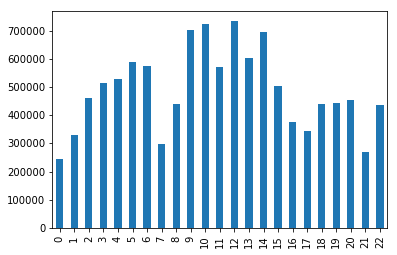

In [34]:
dist=[]
for row in treated.index:
    nlines = len(open("data/samples/treated/%s.fastq" % (row)).readlines())
#     print(nlines)
    dist.append(nlines)

# for row in untreated.index:
#     fh.write(row+'\n')
#     if path.exists("data/samples/"+row+".fastq"):
#         print(row,path.exists("data/samples/"+row+".fastq"))
#         system("mv data/samples/%s.fastq data/samples/untreated/" %(row))
#         count+=1
from pandas import Series
dist = Series(dist)
dist.plot.bar();

In [3]:
from os import system,path
count = 0
fh = open("data/SampleManifestWGS_Treated.txt",'w')
for row in treated.index:
    fh.write(row+'\n')
#     if path.exists("data/samples/"+row+".fastq"):
#         system("mv data/samples/%s.fastq data/samples/treated/"%(row))
#         print(row,path.exists("data/samples/"+row+".fastq"))
#         count+=1
fh.close()
fh = open("data/SampleManifestWGS_Untreated.txt",'w')
for row in untreated.index:
    fh.write(row+'\n')
#     if path.exists("data/samples/"+row+".fastq"):
#         print(row,path.exists("data/samples/"+row+".fastq"))
#         system("mv data/samples/%s.fastq data/samples/untreated/" %(row))
#         count+=1
fh.close()
# count

In [2]:
from sys import path as spath
spath.append("/mnt/research/germs/shane/antibioticResistance/scripts/")
from CRISPRtools import *
from os import chdir

chdir("/mnt/research/germs/shane/antibioticResistance/data")


In [2]:
%%bash
ls -alh assemblies

total 2.5G
drwxr-s--- 2 dooleys1 germs 8.0K Sep 16 21:49 .
drwxr-s--- 6 dooleys1 germs 8.0K Sep 16 21:26 ..
-rw-r----- 1 dooleys1 germs 882M Sep 16 20:58 TreatedAssembly.fa
-rw-r----- 1 dooleys1 germs 256M Sep 16 21:40 TreatedAssembly_filter_gt2k.fa
-rw-r----- 1 dooleys1 germs  58K Sep 16 21:48 TreatedAssembly_filter_gt2k.pcr
-rw-r----- 1 dooleys1 germs 1.1G Sep 16 11:59 UntreatedAssembly.fa
-rw-r----- 1 dooleys1 germs 318M Sep 16 21:46 UntreatedAssembly_filter_gt2k.fa
-rw-r----- 1 dooleys1 germs  85K Sep 16 21:49 UntreatedAssembly_filter_gt2k.pcr
-rw-r----- 1 dooleys1 germs 521K Sep 16 12:10 UntreatedAssembly.mnout


In [4]:
untreadCRISPRs = PilerCRReader("assemblies/UntreatedAssembly_filter_gt2k.pcr")
treadCRISPRs = PilerCRReader("assemblies/TreatedAssembly_filter_gt2k.pcr")

In [5]:
untreatedCRs = []
for seqID,crisprs in untreadCRISPRs.items(): untreatedCRs.append(len(crisprs.repeatCoords))
treatedCRs = []
for seqID,crisprs in treadCRISPRs.items(): treatedCRs.append(len(crisprs.repeatCoords))

count    48.000000
mean      6.687500
std       7.032315
min       3.000000
25%       3.000000
50%       4.500000
75%       6.250000
max      42.000000
dtype: float64


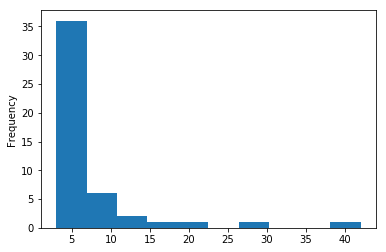

In [7]:
from pandas import Series
untreatedCRs=Series(untreatedCRs)
treatedCRs=Series(treatedCRs)
untreatedCRs.plot.hist();
print(untreatedCRs.describe())

count    34.000000
mean      6.176471
std       4.365641
min       3.000000
25%       3.250000
50%       5.000000
75%       8.000000
max      26.000000
dtype: float64


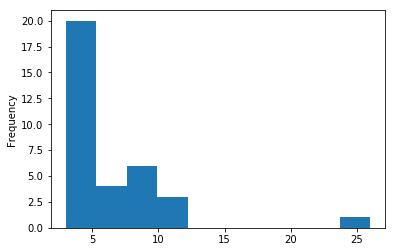

In [8]:
treatedCRs.plot.hist();
print(treatedCRs.describe())